# Heart Disease UCI Project - Classification

For this project we will be exploring publicly available data from https://www.kaggle.com/ronitf/heart-disease-uci.

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information: 
age -age in years
sex-(1 = male; 0 = female)
cp- chest pain type
trestbps- resting blood pressure (in mm Hg on admission to the hospital)
chol -serum cholestoral in mg/dl
fbs -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg -resting electrocardiographic results
thalach- maximum heart rate achieved
exang- exercise induced angina (1 = yes; 0 = no)
oldpeak- ST depression induced by exercise relative to rest
slope- the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal-  3 = normal; 6 = fixed defect; 7 = reversable defect
target - 1 or 0
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.



Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

# Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [59]:
data=pd.read_csv('heart.csv')

In [60]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [62]:
#no empty columns

In [63]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

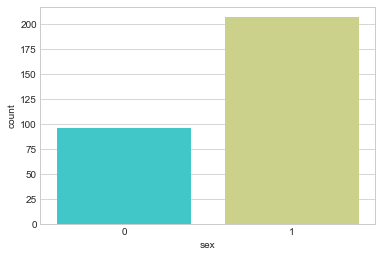

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=data,palette='rainbow')


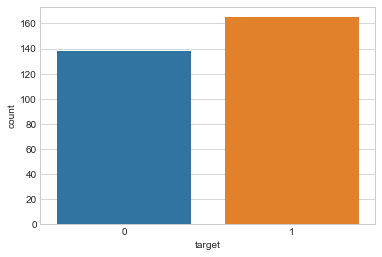

In [65]:
sns.countplot(x='target',data=data)

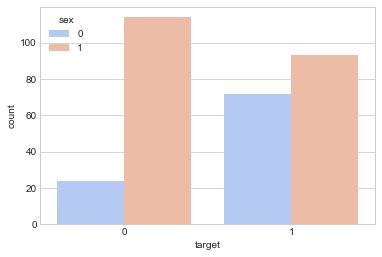

In [66]:
sns.countplot(x='target',data=data,hue='sex',palette='coolwarm')

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


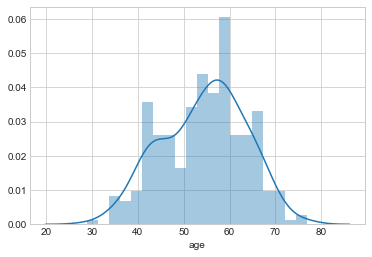

In [67]:
sns.distplot(data['age'],bins=20)


C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


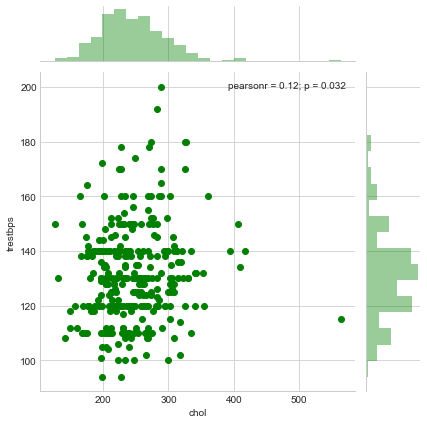

In [68]:

sns.jointplot(x='chol',y='trestbps',data=data,kind='scatter',color='green')

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


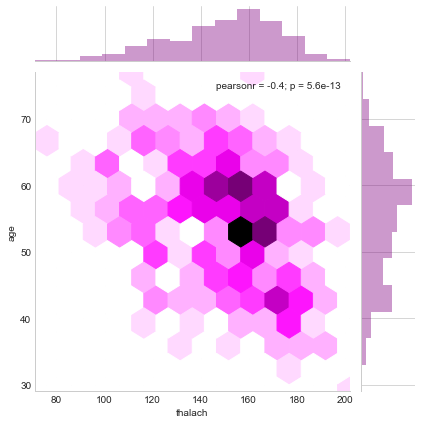

In [69]:
sns.jointplot(x='thalach',y='age',data=data,kind='hex',color='purple')

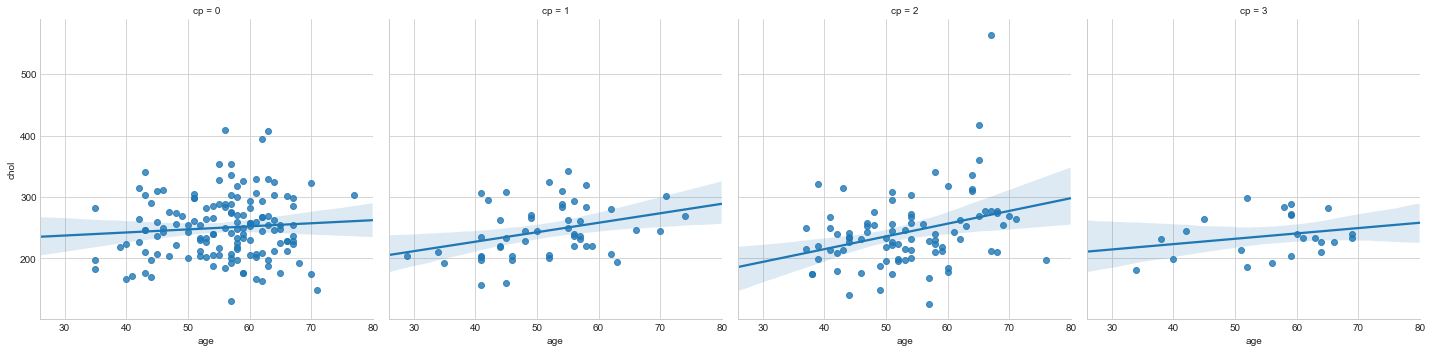

In [70]:
sns.lmplot(x='age',y='chol',data=data,col='cp')
plt.tight_layout()

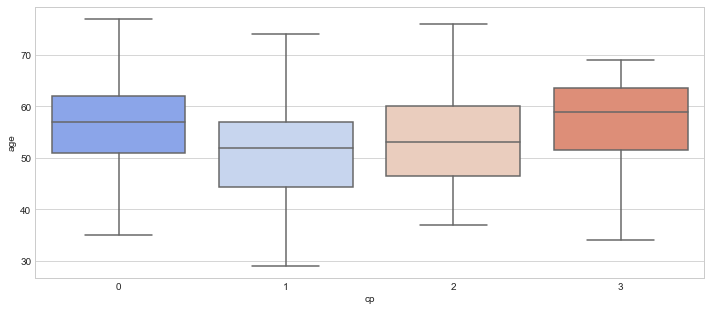

In [71]:
plt.figure(figsize=(12,5))
sns.boxplot(x='cp',y='age',data=data,palette='coolwarm')


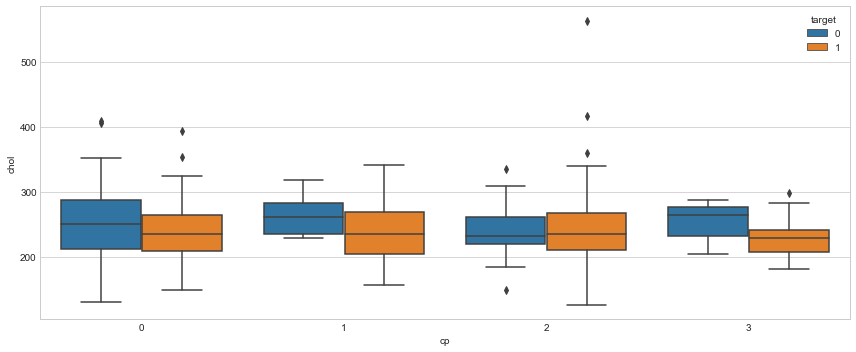

In [72]:
plt.figure(figsize=(12,5))
sns.boxplot(x='cp',y='chol',data=data,hue='target')
plt.tight_layout()


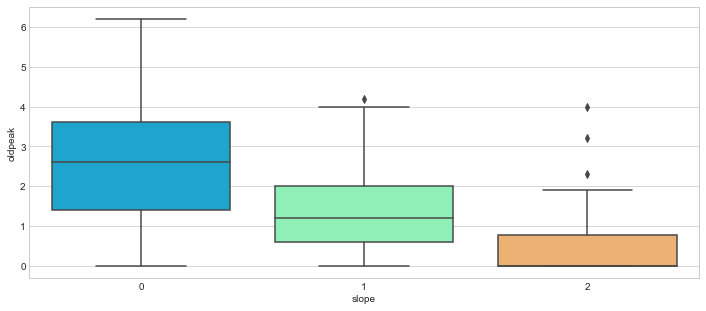

In [73]:
plt.figure(figsize=(12,5))
sns.boxplot(x='slope',y='oldpeak',data=data,palette='rainbow')

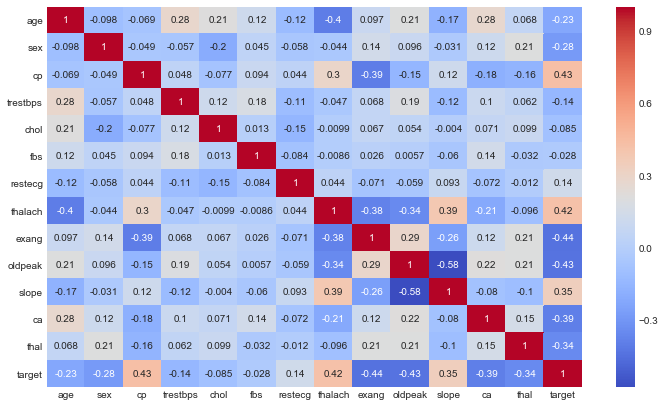

In [74]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

# Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X=data.drop('target',axis=1)
y=data['target']

In [77]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

# Modelling

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [96]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))


Logistic Regression : 0.8791208791208791
Decision Tree Classification : 0.7912087912087912
Random Forest Classification : 0.8241758241758241
Gradient Boosting Classification : 0.8131868131868132
Ada Boosting Classification : 0.8021978021978022
Extra Tree Classification : 0.8241758241758241
K-Neighbors Classification : 0.5824175824175825
Support Vector Classification : 0.5164835164835165
Gausian Naive Bayes : 0.8351648351648352


In [99]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier',
      'K-Neighbors Classifier',
      'Support Vector Classifier',
       'Gaussian Naive Bayes']
x_ax=cla_pred


Text(0.5,0,'Accuracy')

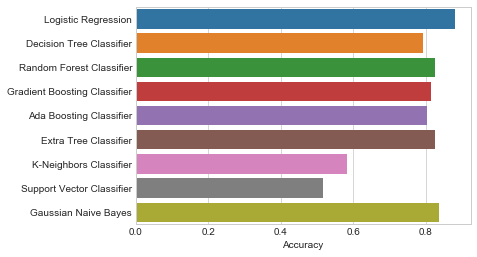

In [100]:
sns.barplot(x=x_ax,y=y_ax)
plt.xlabel('Accuracy')


In [93]:
# When I compared accuracy scores, Logistic Regression is the highest. I would like to use Logistic Regression for this data. 

In [84]:
#Lets check classification report and confusion matrix for Logistic Regression

In [86]:
lm=LogisticRegression()

In [88]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
Lprediction=lm.predict(X_test)

In [90]:
print(classification_report(y_test,Lprediction))

             precision    recall  f1-score   support

          0       0.95      0.80      0.86        44
          1       0.83      0.96      0.89        47

avg / total       0.89      0.88      0.88        91



In [91]:
print(confusion_matrix(y_test,Lprediction))

[[35  9]
 [ 2 45]]
